# Slack Overflow 2018 & 2019 Survey Data #

# 1. Understanding Business Objective: #
The goal of this analysis will be to investigate which tools developers use most commononly and to see how lifestyle may impact job satisfaction. We will compare these survey results to the 2019 survey results to see what tranpired and what did not. We will also build a linear regression model to predict job satisfaction based on salary, Company size, Developer role type and also some "health" attributes like hours outside and exercise. 


# 2.  Understanding the Data: #
The data presents 98855 developer survey participant's results with 129 attributes. These range from demographics to lifestyle to skillset to top tools used in 2018. 


# 3. Preparation of Data: #


In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("Copy of survey_results_public.csv")

C:\Users\AnxhelaCoba\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## We will look at a subset of the data that reflect participants currently employed full-time ##

In [3]:
def split_column_value(df, column, separator=";"):
    """
    INPUT - ori_df  - pandas dataframe -  original dataframe
            column_name - string - the name of the column you would like to splite the value
            separator - string - The is a delimiter. The string splits at this specified separator. If is not provided then ; is the separator.
    OUTPUT - 
            df - pandas dataframe - all value for the column of original dataframe
    """
    df = pd.DataFrame(df[column].dropna().str.split(separator).tolist()).stack()
    return df

In [4]:
df['DevType'].head()

0                                 Full-stack developer
1    Database administrator;DevOps specialist;Full-...
2             Engineering manager;Full-stack developer
3                                 Full-stack developer
4    Data or business analyst;Desktop or enterprise...
Name: DevType, dtype: object

In [4]:
def make_graph(df, column):

    plt.figure(figsize=[15, 10])
    plt.xlabel("Number of Participants".title(), fontsize=20, weight="bold")
    plt.ylabel(column.title(), fontsize=20, weight="bold")
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20, rotation=90)
    plt.style.use("ggplot")
    ax = (
        split_column_value(df, column)
        .value_counts()
        .sort_values(ascending=False)[:10]
        .plot("barh")
    )

    total = len(df[column])
    for p in ax.patches:
        percentage = "{:.1f}%".format(100 * p.get_width() / total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))

    plt.show()

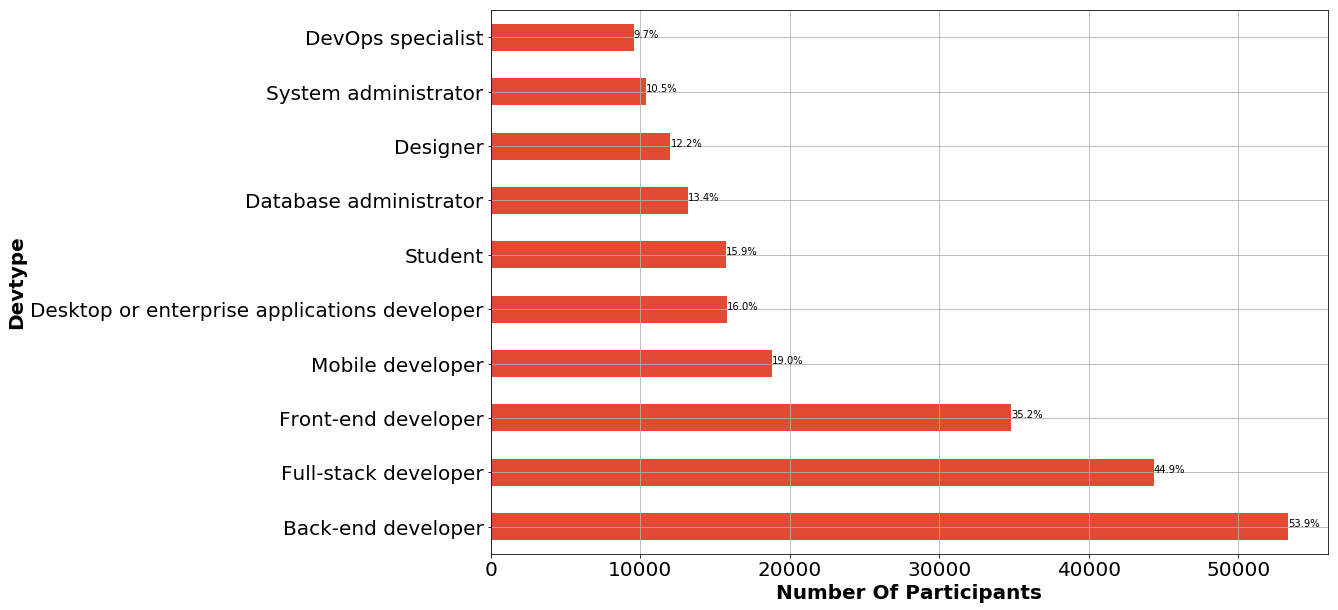

In [6]:
make_graph(df, 'DevType')

In [7]:
df['DevType'].head()

0                                 Full-stack developer
1    Database administrator;DevOps specialist;Full-...
2             Engineering manager;Full-stack developer
3                                 Full-stack developer
4    Data or business analyst;Desktop or enterprise...
Name: DevType, dtype: object

In [14]:
col_names = df.columns.tolist()
col_names

['Respondent',
 'Hobby',
 'OpenSource',
 'Country',
 'Student',
 'Employment',
 'FormalEducation',
 'UndergradMajor',
 'CompanySize',
 'DevType',
 'YearsCoding',
 'YearsCodingProf',
 'JobSatisfaction',
 'CareerSatisfaction',
 'HopeFiveYears',
 'JobSearchStatus',
 'LastNewJob',
 'AssessJob1',
 'AssessJob2',
 'AssessJob3',
 'AssessJob4',
 'AssessJob5',
 'AssessJob6',
 'AssessJob7',
 'AssessJob8',
 'AssessJob9',
 'AssessJob10',
 'AssessBenefits1',
 'AssessBenefits2',
 'AssessBenefits3',
 'AssessBenefits4',
 'AssessBenefits5',
 'AssessBenefits6',
 'AssessBenefits7',
 'AssessBenefits8',
 'AssessBenefits9',
 'AssessBenefits10',
 'AssessBenefits11',
 'JobContactPriorities1',
 'JobContactPriorities2',
 'JobContactPriorities3',
 'JobContactPriorities4',
 'JobContactPriorities5',
 'JobEmailPriorities1',
 'JobEmailPriorities2',
 'JobEmailPriorities3',
 'JobEmailPriorities4',
 'JobEmailPriorities5',
 'JobEmailPriorities6',
 'JobEmailPriorities7',
 'UpdateCV',
 'Currency',
 'Salary',
 'SalaryType',

<IPython.core.display.Javascript object>

# Part Three: Most popular technologies and tools used by Developers in 2018 #

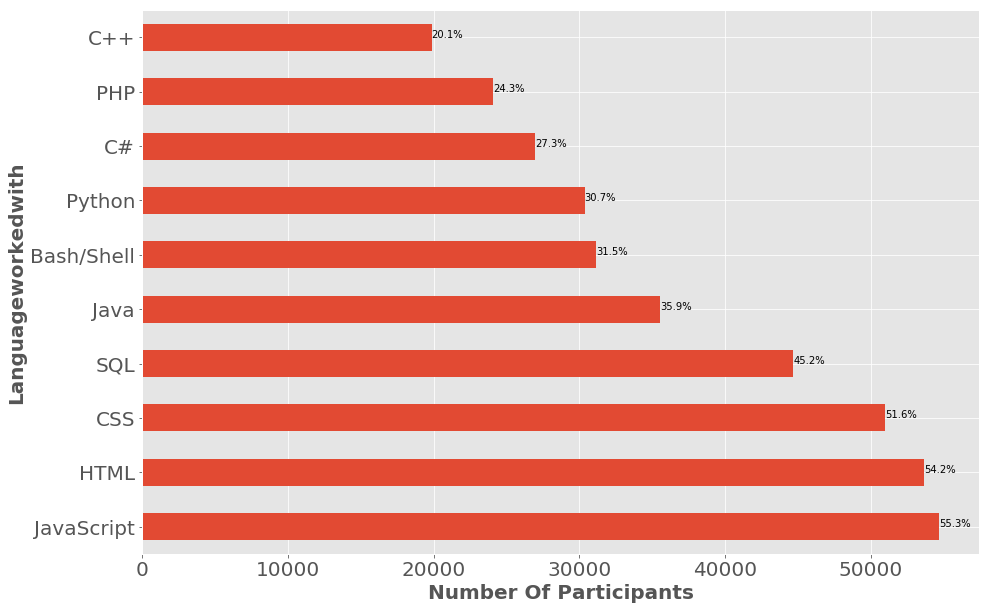

In [11]:
make_graph(df, "LanguageWorkedWith")

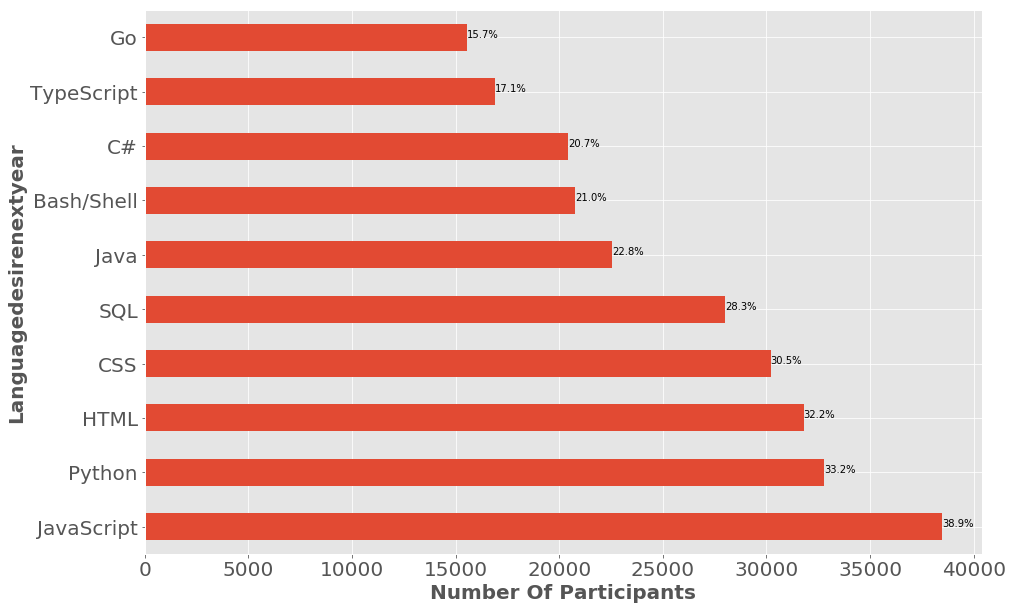

In [8]:
make_graph(df, "LanguageDesireNextYear")

Looking at the top languages used in 2018 we see that the most popular language is JavaScript followed by html, css and then sql, bash/shell and python.  


### 2019 results: Most popular language in 2019 was JavaScript, HTML and CSS. What differed in 2019 is that Python was voted as more popular than java and the bash//shell. ###



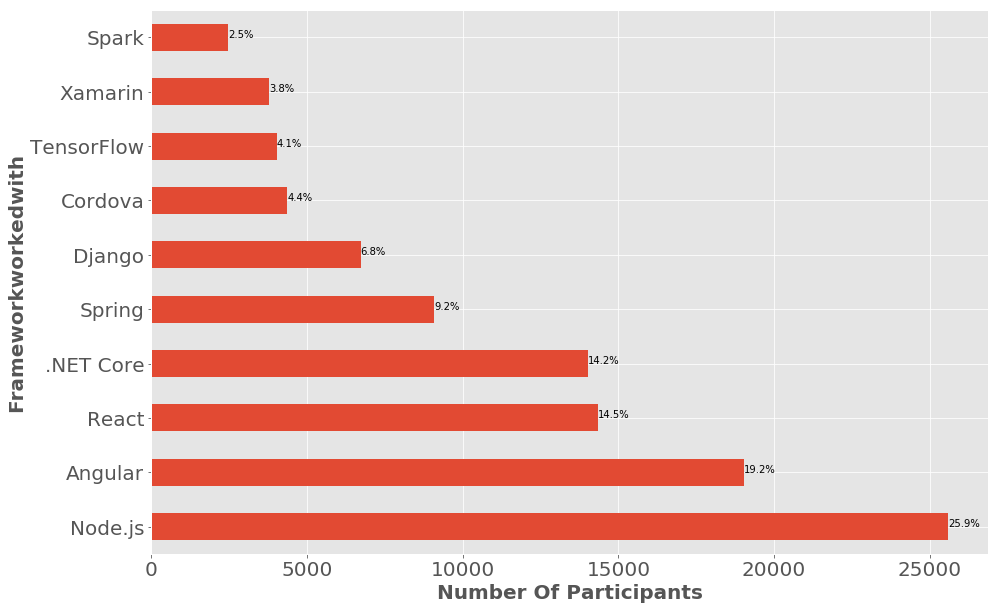

In [12]:
make_graph(df, "FrameworkWorkedWith")

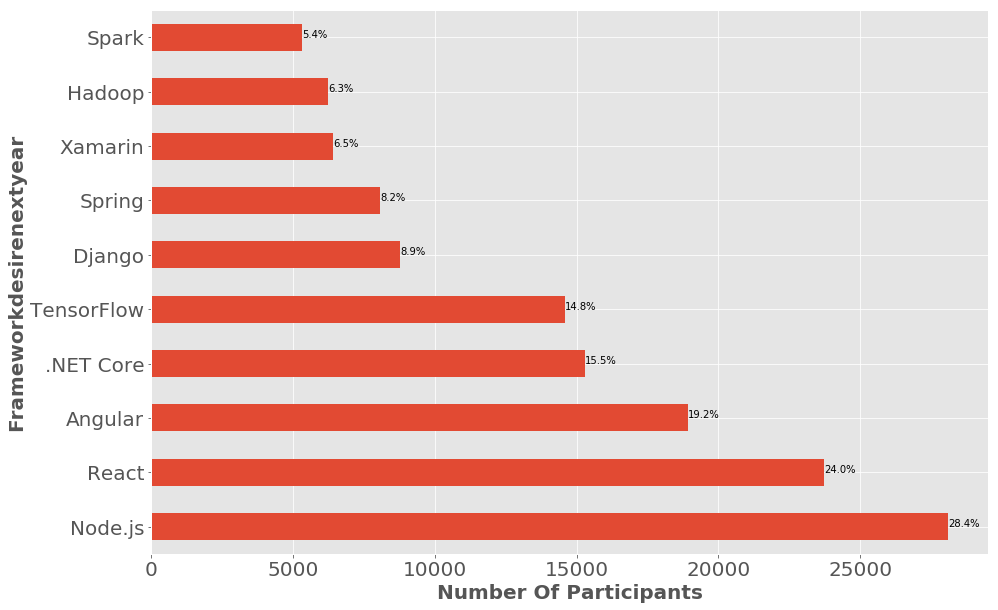

In [13]:
make_graph(df, "FrameworkDesireNextYear")

2018: Node.js was most popular framework, and Angular is the most popular web framework

2019: Node.js still most popular but jQuery is far more common web framework in 2019

In [ ]:
make_graph(df, "IDE")

In [ ]:
make_graph(df, "OperatingSystem")

### VSC best from 2018 and stays best for 2019 as well ###


# Participants Demographics # 

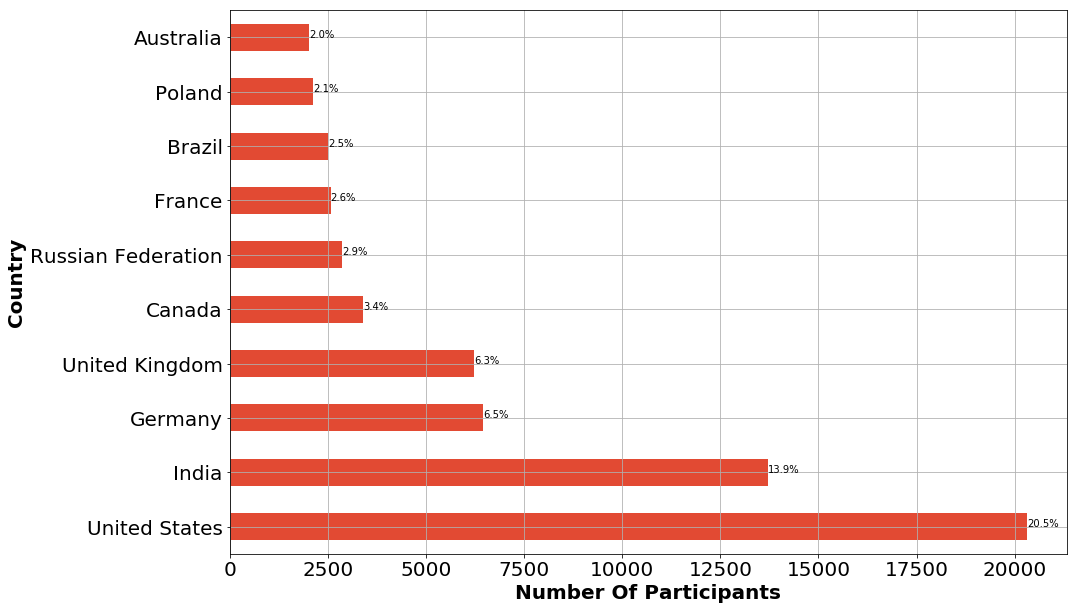

In [6]:
make_graph(df, "Country")

In [ ]:
make_graph(df, "Gender")

In [ ]:
make_graph(df, "RaceEthnicity")

In [ ]:
make_graph(df, "Age")

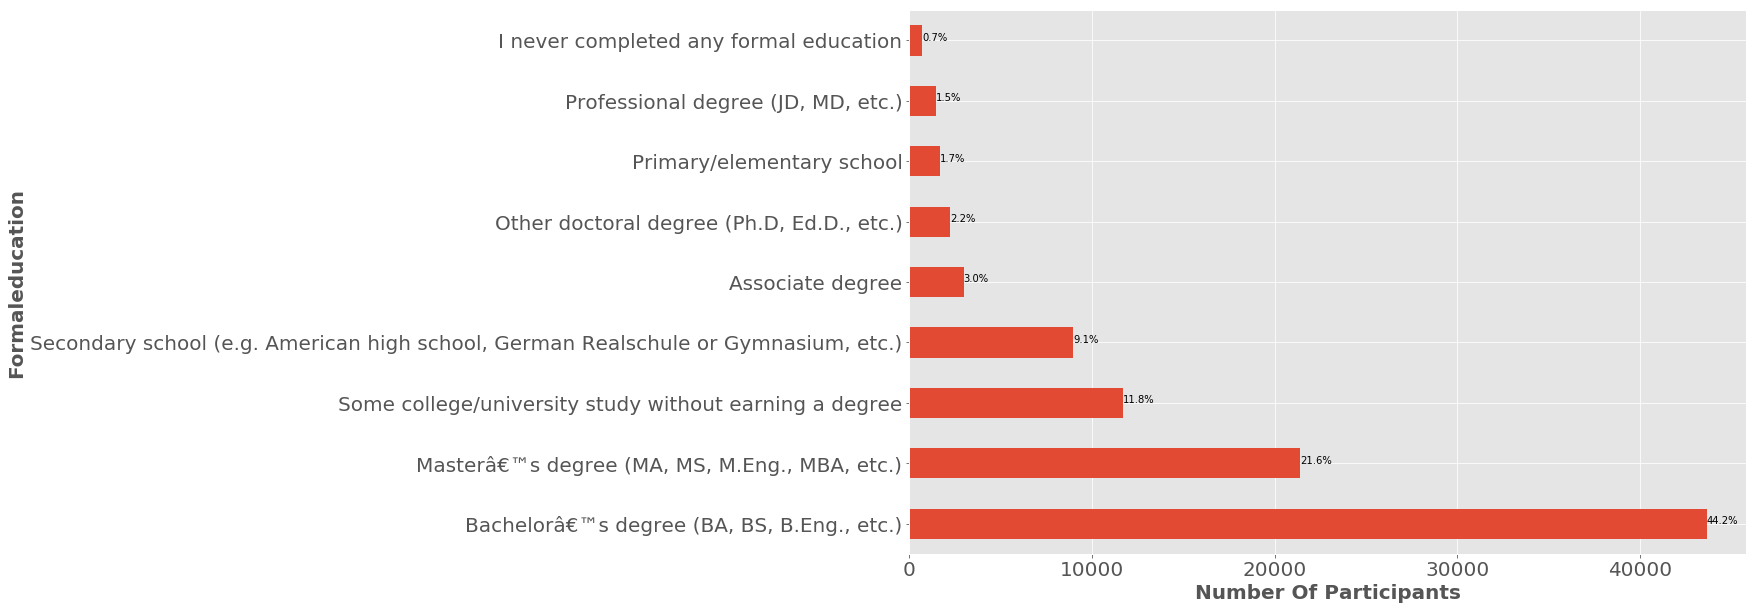

In [7]:
make_graph(df, "FormalEducation")

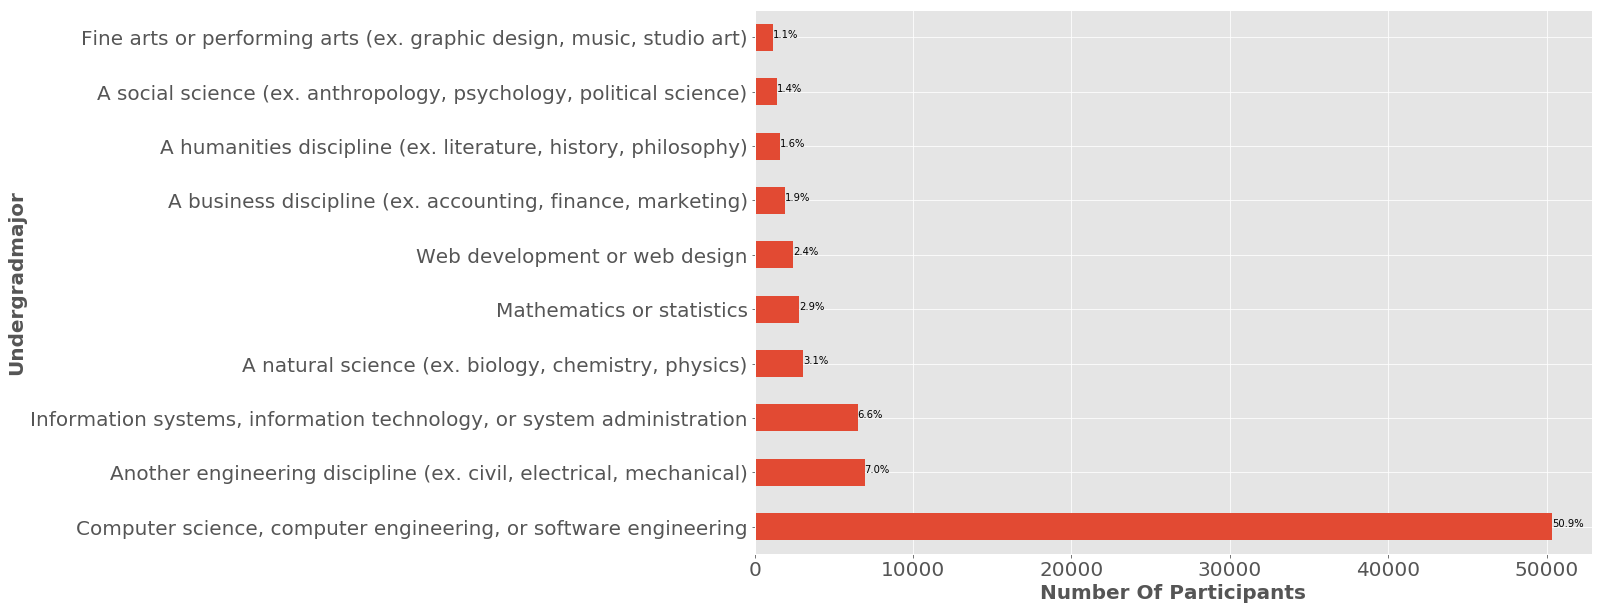

In [9]:
make_graph(df, "UndergradMajor")

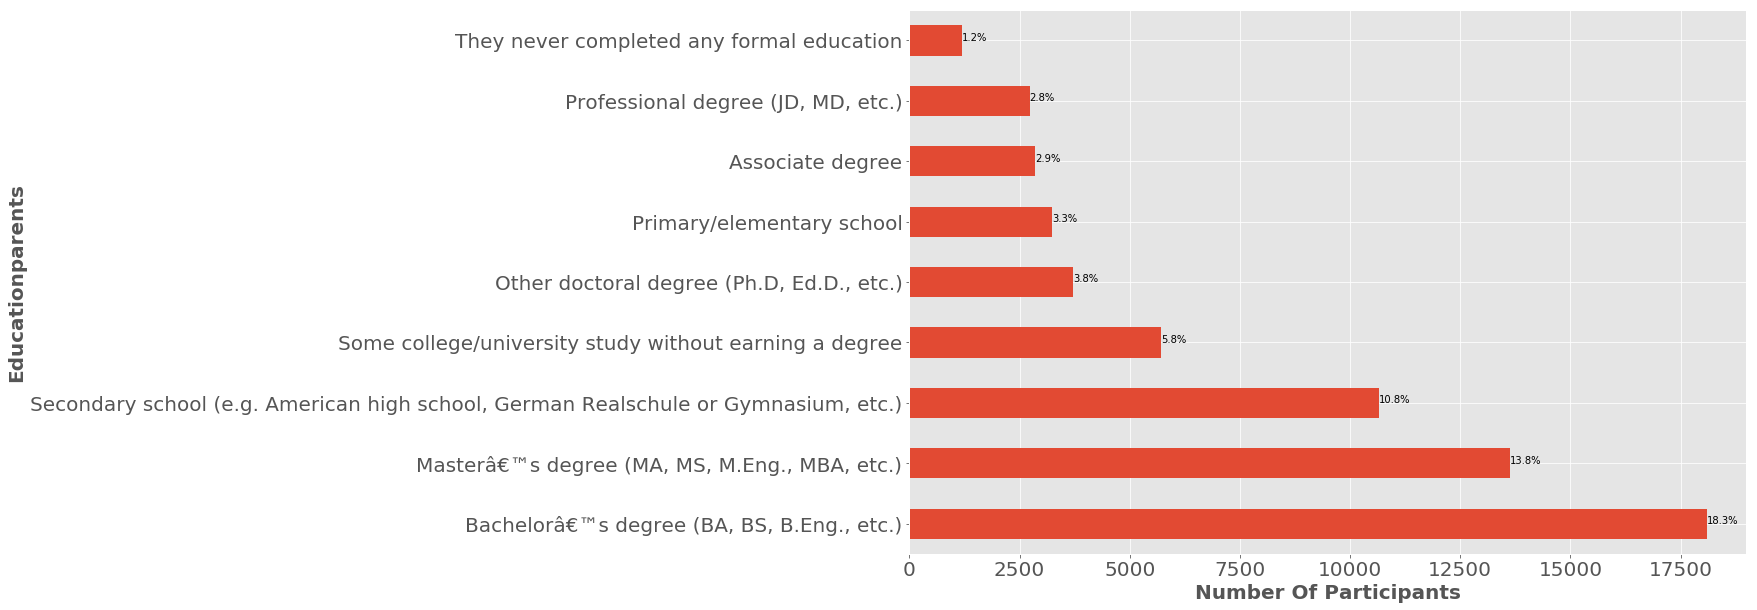

In [8]:
make_graph(df, "EducationParents")

We see below that most of the participants are male, white and 25-34 years old whom hold a Bachelor's degree in either CS, CE or SE.

# Part 3: Modeling Career Satisfaction#

In [ ]:
fig, ax = plt.subplots(nrows=3, figsize=[25, 10])

default_color = sb.color_palette()[0]
sb.countplot(data=df, x="WakeTime", hue="HoursComputer", color=default_color, ax=ax[0])
sb.countplot(
    data=df, x="HoursOutside", hue="HoursComputer", color=default_color, ax=ax[1]
)
sb.countplot(data=df, x="Exercise", hue="HoursComputer", color=default_color, ax=ax[2])

ax[0].title.set_text("What Time Participants Wake Up")
ax[1].title.set_text("Hours Spent Outside")
ax[2].title.set_text("Hours Spent Exercising")

plt.tight_layout()
plt.show()

Above we see that most developers that spend most time on computer wake up between 7AM-8AM. We also see that more time spent on computer does not neccesarily indicate less time spent outside. We see that most developers spent about 1-2 hours a day outside. Even developers spending more than 12 hours will find time to spend outside. However, we see most developers working about 9-12 hours do not typically exercise. 

### Looking at Salary and how that plays a role for lifestyle #

In [ ]:
df["ConvertedSalary"].dtype

In [ ]:
df["ConvertedSalary"].unique()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df["ConvertedSalary"] = df["ConvertedSalary"].astype(np.int64)

# Summary on Hours Spent on Computer #
Below, we see a few interesting things. We see that most developers that spend more time on the computer (9-12 hours) typically get paid more than those that do no spend as much time (5-8). We also see that developers under that category also claim to code as a hobby. 

In [ ]:
fig, ax = plt.subplots(nrows=3, figsize=[25, 10])

default_color = sb.color_palette()[0]


sb.countplot(data=df, x="Hobby", hue="HoursComputer", color=default_color, ax=ax[0])
sb.countplot(data=df, x="HoursComputer", hue="Hobby", color=default_color, ax=ax[1])

sb.countplot(
    data=df, x="HoursComputer", hue="ConvertedSalary", color=default_color, ax=ax[2]
)

# AI Analysis #

In [ ]:
make_graph(df, 'AIDangerous')

In [ ]:
make_graph(df, "AIInteresting")



In [ ]:
make_graph(df,"AIResponsible")

In [ ]:
make_graph(df, "AIFuture")

# Summary of AI: #
It seems that most developers believe the most dangerous aspect of AI is that ultimately Algorithms will make important decisions. That could end in dangerous consequences. Most interesting thing about AI to developers in this survey is the increase of automation in jobs. When it comes to responsibility, most developers agree that the developer or people creating the AI should be responsible for it, rather than the government or prominent industry leaders. Optimistically, most developers are more excited than worried about the dangers of AI. 

# Ethics #

In [ ]:
make_graph(df, "EthicsChoice")

In [ ]:
make_graph(df, "EthicsReport")


In [ ]:
make_graph(df, "EthicsResponsible")

# Summary for Ethics: #

Most developers would not write code for an unethical purpose. However, most developers would report unethical code only depending on what it was. Also most developers believe it is not up to developers to deal with unethical causes from code they write, but rather upper management. 

# Career satisfaction survey outcomes #

In [ ]:
make_graph(df, "CareerSatisfaction")

In [ ]:
make_graph(df, "Salary")

In [ ]:
make_graph(df, "JobSatisfaction")

### Career Satisfaction Summary:#

In general, developers are more dissatisfied with thier job than their career. 


# Building LinearRegression Model to Predict Next Years Most Popular/Desired Language and Actual Language. #
We will also build a linear regression model to predict job satisfaction based on salary, Company size, Developer role type and also some "health" attributes like hours outside and exercise. 

In [5]:
df['JobSatisfaction'].unique()

array(['Extremely satisfied', 'Moderately dissatisfied',
       'Moderately satisfied', 'Neither satisfied nor dissatisfied',
       'Slightly satisfied', nan, 'Slightly dissatisfied',
       'Extremely dissatisfied'], dtype=object)

In [6]:
df['JobSatisfaction'].head()

0                   Extremely satisfied
1               Moderately dissatisfied
2                  Moderately satisfied
3    Neither satisfied nor dissatisfied
4                    Slightly satisfied
Name: JobSatisfaction, dtype: object

In [10]:
# First we will make JobSatisfaction values numerical:

df['JobSatisfaction'].replace({'Extremely satisfied':1, 'Moderately dissatisfied':2,
       'Moderately satisfied':3, 'Neither satisfied nor dissatisfied':4,
       'Slightly satisfied':5,'Slightly dissatisfied':6,
       'Extremely dissatisfied':7}, inplace=True)

In [11]:
df['JobSatisfaction'].head()

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
Name: JobSatisfaction, dtype: float64

In [ ]:
# try predicting the most common language of 2018 using only 2018 attributes:
# then try predicting the most common language of 2019 using 2018 attributes:

In [5]:
def split_column_value(df, column, separator=";"):
    """
    INPUT - ori_df  - pandas dataframe -  original dataframe
            column_name - string - the name of the column you would like to splite the value
            separator - string - The is a delimiter. The string splits at this specified separator. If is not provided then ; is the separator.
    OUTPUT - 
            df - pandas dataframe - all value for the column of original dataframe
    """
    df = pd.DataFrame(df[column].dropna().str.split(separator).tolist()).stack()
    return df

In [4]:
df_new = pd.DataFrame()

In [5]:
df_new

""


In [6]:
df_new['DevType'] = split_column_value(df, "DevType")
df_new["LanguageDesireNextYear"] = split_column_value(df,"LanguageDesireNextYear")
df_new["LanguageWorkedWith"] = split_column_value(df,  "LanguageWorkedWith")
df_new["DatabaseWorkedWith"] = split_column_value(df, "DatabaseWorkedWith")
df_new["DatabaseDesireNextYear"] = split_column_value(df, "DatabaseDesireNextYear")
df_new["PlatformWorkedWith"] = split_column_value(df, "PlatformWorkedWith")
df_new["PlatformDesireNextYear"] = split_column_value(df, "PlatformDesireNextYear")
df_new["FrameworkWorkedWith"] = split_column_value(df, "FrameworkWorkedWith")
df_new["FrameworkDesireNextYear"] = split_column_value(df, "FrameworkDesireNextYear")
df_new["IDE"] = split_column_value(df, "IDE")
df_new["OperatingSystem"] = split_column_value(df,  "OperatingSystem")



In [11]:

lang_dic = {'JavaScript':0,'Python':1,'HTML':2,'CSS':3,'C#':4,'SQL':5,'TypeScript':6, 'Bash/Shell':7, 'C':8,'C++':9,'Java':10, 'Matlab':11,'R':12, 'Assembly':13, 'CoffeeScript':14, 'Erlang':15, 'Go':16,'PHP':17, 'VB.NET':18, 'Swift':19, 'Groovy':20,'Objective-C':21, "F#":22,'Haskell':23, 'Ruby':24, "Rust":25, 'Julia':26 ,"VBA":27, "Scala":28 ,"Perl":29, "Perl":30,"Visual Basic 6":31,"Kotlin":32,"Hack":33, "Lua":34,"Clojure":35,"Delphi/Object Pascal":36, "Cobol":37,"Ocaml":38}

#df_new['LanguageWorkedWith numeric']= df_new['LanguageWorkedWith'].map(lang_dic)


In [9]:
df_new.head()

DevType LanguageDesireNextYear LanguageWorkedWith  \
0 0    Full-stack developer             JavaScript         JavaScript   
1 0  Database administrator                     Go         JavaScript   
  1       DevOps specialist                 Python             Python   
  2    Full-stack developer                    NaN         Bash/Shell   
  3    System administrator                    NaN                NaN   

    DatabaseWorkedWith DatabaseDesireNextYear PlatformWorkedWith  \
0 0              Redis                  Redis                AWS   
1 0              Redis             PostgreSQL              Linux   
  1         PostgreSQL                    NaN                NaN   
  2          Memcached                    NaN                NaN   
  3                NaN                    NaN                NaN   

    PlatformDesireNextYear FrameworkWorkedWith FrameworkDesireNextYear  \
0 0                    AWS              Django                  Django   
1 0                  Linux              Django                   React   
  1                    NaN                 NaN                     NaN   
  2                    NaN                 NaN                     NaN   
  3                    NaN                 NaN                     NaN   

                   IDE OperatingSystem  LanguageWorkedWith numeric  
0 0             Komodo     Linux-based                         0.0  
1 0  IPython / Jupyter     Linux-based                         0.0  
  1       Sublime Text             NaN                         1.0  
  2                Vim             NaN                         7.0  
  3                NaN             NaN                         NaN

In [11]:
#df_new.drop(['LanguageWorkedWith'], axis=1, inplace=True)

In [7]:
next_year = pd.read_csv(
    "C:/Users/AnxhelaCoba/Downloads/developer_survey_2019/survey_results_public.csv"
)

In [36]:
year_2017 = pd.read_csv("C:/Users/AnxhelaCoba/Downloads/developer_survey_2017/survey_results_public.csv")

In [38]:
year_2016 = pd.read_csv("C:/Users/AnxhelaCoba/Downloads/2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Responses.csv")

In [44]:
year_2015 = pd.read_csv("C:/Users/AnxhelaCoba/Downloads/2015 Stack Overflow Developer Survey Responses/2015 Stack Overflow Developer Survey Responses.csv")

In [48]:
year_2014 = pd.read_csv("C:/Users/AnxhelaCoba/Downloads/2014 Stack Overflow Survey Responses/2014 Stack Overflow Survey Responses.csv")

In [49]:
year_2013 = pd.read_csv("C:/Users/AnxhelaCoba/Downloads/2013 Stack Overflow Survey Responses/2013 Stack Overflow Survey Responses.csv")

C:\Users\AnxhelaCoba\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (46,48,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [52]:
year_2012 = pd.read_csv("C:/Users/AnxhelaCoba/Downloads/2012 Stack Overflow Survey Results/2012 Stack Overflow Survey Results.csv")

In [54]:
year_2011 = pd.read_csv("C:/Users/AnxhelaCoba/Downloads/2011 Stack Overflow Survey Results/2011 Stack Overflow Survey Results.csv")

In [117]:
year_2017['LanguageWorkedWith'] = year_2017['HaveWorkedLanguage']

In [118]:
year_2016['LanguageWorkedWith'] = year_2016["tech_do"]

In [83]:
# creating 2015 lang used column:

year_2015['LanguageWorkedWith'] = year_2015[year_2015.columns[7:49]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

In [95]:
year_2014.columns.get_loc("Which of the following languages or technologies have you used significantly in the past year?")

42

In [98]:
year_2014.columns.get_loc("Unnamed: 66")

66

In [99]:
# creating 2014 lang used column:
year_2014['LanguageWorkedWith'] = year_2014[year_2014.columns[42:66]].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

In [102]:
year_2013.columns.get_loc('Which of the following languages or technologies have you used significantly in the past year?')

56

In [103]:
year_2013.columns.get_loc("Unnamed: 80")

80

In [104]:
# creating 2013 lang used column:

year_2013['LanguageWorkedWith'] = year_2013[year_2013.columns[56:88]].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

In [107]:
year_2012.columns.get_loc("Which languages are you proficient in?")

22

In [108]:
year_2012.columns.get_loc("Unnamed: 36")

36

In [109]:
# creating 2012 lang used column:

year_2012['LanguageWorkedWith'] = year_2012[year_2012.columns[22:36]].apply(lambda x: ",".join(x.dropna().astype(str)), axis=1)

In [112]:
year_2011.columns.get_loc("Which languages are you proficient in?")

30

In [113]:
year_2011.columns.get_loc("Unnamed: 42")

42

In [115]:
# creating 2011 lang used column:

year_2011['LanguageWorkedWith'] = year_2011[year_2011.columns[30:42]].apply (lambda x: ",".join(x.dropna().astype(str)), axis=1)

In [120]:
# Now we will make a dataframe with all the columns we created above for languages worked with in that current year:

lang_df = pd.DataFrame()

lang_df['2011'] = split_column_value(year_2011, 'LanguageWorkedWith')
lang_df['2012'] = split_column_value(year_2012, 'LanguageWorkedWith')
lang_df['2013'] = split_column_value(year_2013, 'LanguageWorkedWith')
lang_df['2014'] = split_column_value(year_2014, 'LanguageWorkedWith')
lang_df['2015'] = split_column_value(year_2015, 'LanguageWorkedWith')
lang_df['2016'] = split_column_value(year_2016, 'LanguageWorkedWith')
lang_df['2017'] = split_column_value(year_2017, 'LanguageWorkedWith')
lang_df['2018'] = split_column_value(df, 'LanguageWorkedWith')
lang_df['2019'] = split_column_value(next_year, 'LanguageWorkedWith')

KeyError: 'LanguageWorkedWith'

In [8]:
next_year.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [9]:
df_new['NextYearLanguage'] = split_column_value(next_year, 'LanguageWorkedWith')

In [12]:
df_new['NextYearLanguage numeric']= df_new['NextYearLanguage'].map(lang_dic)

In [13]:
# First we need to convert categroical variables to dummie variables. Isolate the categorical variables:
df_new = df_new.dropna(subset=['NextYearLanguage numeric'], axis=0)
y = df_new['NextYearLanguage numeric']

df_new = df_new.drop(['NextYearLanguage numeric'], axis=1)

df_num = df_new.select_dtypes(include=["float", "int"]).columns
for col in df_num:
    df_new[col].fillna((df_new[col].mean()), inplace=True)

df_cat = df_new.select_dtypes(include=["object"]).columns
for cat in df_cat:
    df_new = pd.concat(
        [
            df_new.drop(cat, axis=1),
            pd.get_dummies(df_new[cat], prefix=cat, prefix_sep="_", drop_first=True),
        ],
        axis=1,
    )


X = df_new

In [14]:
df_new.head()

DevType_C-suite executive (CEO, CTO, etc.)  \
1 0                                           0   
  2                                           0   
3 0                                           0   
4 0                                           0   
  2                                           0   

     DevType_Data or business analyst  \
1 0                                 0   
  2                                 0   
3 0                                 0   
4 0                                 1   
  2                                 0   

     DevType_Data scientist or machine learning specialist  \
1 0                                                  0       
  2                                                  0       
3 0                                                  0       
4 0                                                  0       
  2                                                  0       

     DevType_Database administrator  DevType_Designer  \
1 0                               1                 0   
  2                               0                 0   
3 0                               0                 0   
4 0                               0                 0   
  2                               0                 0   

     DevType_Desktop or enterprise applications developer  \
1 0                                                  0      
  2                                                  0      
3 0                                                  0      
4 0                                                  0      
  2                                                  0      

     DevType_DevOps specialist  DevType_Educator or academic researcher  \
1 0                          0                                        0   
  2                          0                                        0   
3 0                          0                                        0   
4 0                          0                                        0   
  2                          0                                        0   

     DevType_Embedded applications or devices developer  \
1 0                                                  0    
  2                                                  0    
3 0                                                  0    
4 0                                                  0    
  2                                                  0    

     DevType_Engineering manager  ...  NextYearLanguage_PHP  \
1 0                            0  ...                     0   
  2                            0  ...                     0   
3 0                            0  ...                     0   
4 0                            0  ...                     0   
  2                            0  ...                     0   

     NextYearLanguage_Python  NextYearLanguage_R  NextYearLanguage_Ruby  \
1 0                        0                   0                      0   
  2                        1                   0                      0   
3 0                        0                   0                      0   
4 0                        0                   0                      0   
  2                        0                   0                      0   

     NextYearLanguage_Rust  NextYearLanguage_SQL  NextYearLanguage_Scala  \
1 0                      0                     0                       0   
  2                      0                     0                       0   
3 0                      0                     0                       0   
4 0                      0                     0                       0   
  2                      0                     0                       0   

     NextYearLanguage_Swift  NextYearLanguage_TypeScript  NextYearLanguage_VBA  
1 0                       0                            0                     0  
  2                       0                            0                     0  
3 0                       0     

In [15]:
y.unique()

array([ 9.,  1.,  8., 10.,  0., 12.,  5.,  4., 24., 25., 13., 17.,  6.,
       16., 27., 35., 32., 22., 15., 28., 21., 19.])

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [18]:
# Create linear regression object
regr =LinearRegression()


In [19]:
# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [20]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [-3.40484123e-15  1.48214774e-14 -5.55111512e-15  2.88657986e-15
 -7.66053887e-15  4.44089210e-16  1.39888101e-14  1.70974346e-14
  4.44089210e-15 -1.52100554e-14 -4.21884749e-15  1.33226763e-15
  1.07830411e-14  1.87627691e-14  5.49560397e-15  1.24344979e-14
  1.32671651e-14  1.92068583e-14 -3.99680289e-15 -1.10605969e-14
 -2.30371278e-15 -2.88657986e-15  3.19189120e-15 -1.11854970e-14
 -9.70057368e-15 -9.09342046e-15  2.82759927e-15  5.39499001e-15
 -1.22644950e-14  6.73072709e-15  7.86870569e-15 -1.65787523e-14
  1.42247325e-15 -6.15826834e-16  1.08437564e-14 -3.88578059e-16
 -4.21884749e-15  4.76528539e-15 -5.27355937e-16 -1.44884105e-14
  6.29704622e-16  1.35863543e-14 -1.73489695e-14  4.56579219e-15
 -4.18415302e-15  3.35842465e-15 -5.29437605e-15  3.80251386e-15
 -5.56499291e-15  9.83935156e-15 -4.47558657e-15  3.13638004e-15
  9.89486271e-15  1.08862572e-14  4.71497841e-15 -2.31013125e-14
 -7.21644966e-16  1.91513472e-15 -9.43689571e-16 -1.11022302e-15
  3.78863

In [21]:
df_new.head()

DevType_C-suite executive (CEO, CTO, etc.)  \
1 0                                           0   
  2                                           0   
3 0                                           0   
4 0                                           0   
  2                                           0   

     DevType_Data or business analyst  \
1 0                                 0   
  2                                 0   
3 0                                 0   
4 0                                 1   
  2                                 0   

     DevType_Data scientist or machine learning specialist  \
1 0                                                  0       
  2                                                  0       
3 0                                                  0       
4 0                                                  0       
  2                                                  0       

     DevType_Database administrator  DevType_Designer  \
1 0                               1                 0   
  2                               0                 0   
3 0                               0                 0   
4 0                               0                 0   
  2                               0                 0   

     DevType_Desktop or enterprise applications developer  \
1 0                                                  0      
  2                                                  0      
3 0                                                  0      
4 0                                                  0      
  2                                                  0      

     DevType_DevOps specialist  DevType_Educator or academic researcher  \
1 0                          0                                        0   
  2                          0                                        0   
3 0                          0                                        0   
4 0                          0                                        0   
  2                          0                                        0   

     DevType_Embedded applications or devices developer  \
1 0                                                  0    
  2                                                  0    
3 0                                                  0    
4 0                                                  0    
  2                                                  0    

     DevType_Engineering manager  ...  NextYearLanguage_PHP  \
1 0                            0  ...                     0   
  2                            0  ...                     0   
3 0                            0  ...                     0   
4 0                            0  ...                     0   
  2                            0  ...                     0   

     NextYearLanguage_Python  NextYearLanguage_R  NextYearLanguage_Ruby  \
1 0                        0                   0                      0   
  2                        1                   0                      0   
3 0                        0                   0                      0   
4 0                        0                   0                      0   
  2                        0                   0                      0   

     NextYearLanguage_Rust  NextYearLanguage_SQL  NextYearLanguage_Scala  \
1 0                      0                     0                       0   
  2                      0                     0                       0   
3 0                      0                     0                       0   
4 0                      0                     0                       0   
  2                      0                     0                       0   

     NextYearLanguage_Swift  NextYearLanguage_TypeScript  NextYearLanguage_VBA  
1 0                       0                            0                     0  
  2                       0                            0                     0  
3 0                       0     

In [26]:
c = df_new.corr().abs()

s = c.unstack()
so = s.sort_values(ascending = False,kind="quicksort")

In [27]:
so

NextYearLanguage_VBA                                                 NextYearLanguage_VBA                                                   1.000000e+00
PlatformDesireNextYear_IBM Cloud or Watson                           PlatformDesireNextYear_IBM Cloud or Watson                             1.000000e+00
PlatformWorkedWith_iOS                                               PlatformWorkedWith_iOS                                                 1.000000e+00
PlatformDesireNextYear_Amazon Echo                                   PlatformDesireNextYear_Amazon Echo                                     1.000000e+00
PlatformDesireNextYear_Android                                       PlatformDesireNextYear_Android                                         1.000000e+00
PlatformDesireNextYear_Apple Watch or Apple TV                       PlatformDesireNextYear_Apple Watch or Apple TV                         1.000000e+00
PlatformDesireNextYear_Arduino                                       PlatformDesir

In [28]:
import statsmodels.api as sm

In [29]:
lm = sm.OLS(X, y)

In [30]:
lm_fit = lm.fit()